C:\Users\Dom\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [131]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("C:/Users/Dom/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 1
    j = 2
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==1 and j==2:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)


In [132]:
import tensorflow as tf
import tensorflow.keras as keras

In [133]:
targetData = np.zeros((len(tData[0][0]), 3))
for counter, i in enumerate(classification):
    targetData[counter][int(i-1)] = 1
targetData

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [134]:
import time

accuracy = []
start = time.clock
for i in range(999):
    if i % 10 == 0:

        xData = tData[i][0]
        yData = tData[i][1]
        trainingData = np.vstack((xData, yData)).T
        # NN model code
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
        model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
        model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

        model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
        nnet = model.fit(trainingData, targetData, epochs=2, validation_split=0.2)
        accuracy.append(np.mean(nnet.history["acc"]))
    
print(accuracy)

Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 5s 34ms/step - loss: 1.2810 - acc: 0.0845 - val_loss: 0.9149 - val_acc: 0.9444
Epoch 2/2
142/142 [==============================] - 0s 162us/step - loss: 1.2348 - acc: 0.0986 - val_loss: 0.9661 - val_acc: 0.8333
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 5s 34ms/step - loss: 1.1017 - acc: 0.3662 - val_loss: 1.0368 - val_acc: 0.9722
Epoch 2/2
142/142 [==============================] - 0s 148us/step - loss: 1.0887 - acc: 0.4789 - val_loss: 1.0479 - val_acc: 0.9722
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [==============================] - 5s 34ms/step - loss: 1.1160 - acc: 0.2817 - val_loss: 1.0326 - val_acc: 0.9167
Epoch 2/2
142/142 [==============================] - 0s 190us/step - loss: 1.0972 - acc: 0.4366 - val_loss: 1.0341 - val_acc: 0.8333
Train on 142 samples, validate on 36 samples
Epoch 1/2
142/142 [======

In [135]:
accuracy

[0.0915492961943989,
 0.4225352129466097,
 0.3591549302070913,
 0.5845070426732721,
 0.3873239424027188,
 0.647887322264658,
 0.3556338032366524,
 0.4894366201380609,
 0.5000000014691286,
 0.6056338049156565]

5 0.647887322264658


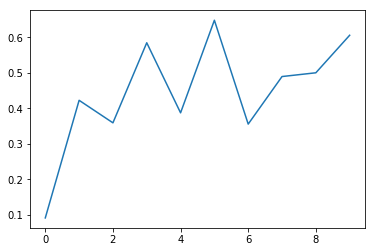

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(0, len(accuracy)))

new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")

max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

In [123]:
# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
abcd = model.fit(trainingData, targetData, epochs=100, validation_split=0.2)

abcd.history["acc"]


Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 2s 13ms/step - loss: 1.1139 - acc: 0.3894 - val_loss: 1.1106 - val_acc: 0.3448
Epoch 2/100
113/113 [==============================] - 0s 88us/step - loss: 1.1048 - acc: 0.3628 - val_loss: 1.1020 - val_acc: 0.3448
Epoch 3/100
113/113 [==============================] - 0s 88us/step - loss: 1.0962 - acc: 0.3628 - val_loss: 1.0947 - val_acc: 0.3448
Epoch 4/100
113/113 [==============================] - 0s 97us/step - loss: 1.0903 - acc: 0.3628 - val_loss: 1.0901 - val_acc: 0.3448
Epoch 5/100
113/113 [==============================] - 0s 88us/step - loss: 1.0863 - acc: 0.3628 - val_loss: 1.0866 - val_acc: 0.3448
Epoch 6/100
113/113 [==============================] - 0s 88us/step - loss: 1.0829 - acc: 0.3628 - val_loss: 1.0832 - val_acc: 0.3448
Epoch 7/100
113/113 [==============================] - 0s 88us/step - loss: 1.0800 - acc: 0.3628 - val_loss: 1.0803 - val_acc: 0.3448
Epoch 8/100
113/1

113/113 [==============================] - 0s 106us/step - loss: 0.9226 - acc: 0.5398 - val_loss: 0.8780 - val_acc: 0.5862
Epoch 62/100
113/113 [==============================] - 0s 97us/step - loss: 0.9209 - acc: 0.5487 - val_loss: 0.8765 - val_acc: 0.5862
Epoch 63/100
113/113 [==============================] - 0s 88us/step - loss: 0.9198 - acc: 0.5487 - val_loss: 0.8758 - val_acc: 0.5862
Epoch 64/100
113/113 [==============================] - 0s 97us/step - loss: 0.9184 - acc: 0.5575 - val_loss: 0.8739 - val_acc: 0.5862
Epoch 65/100
113/113 [==============================] - 0s 88us/step - loss: 0.9166 - acc: 0.5664 - val_loss: 0.8726 - val_acc: 0.6207
Epoch 66/100
113/113 [==============================] - 0s 88us/step - loss: 0.9152 - acc: 0.5752 - val_loss: 0.8716 - val_acc: 0.6207
Epoch 67/100
113/113 [==============================] - 0s 71us/step - loss: 0.9141 - acc: 0.5664 - val_loss: 0.8706 - val_acc: 0.6552
Epoch 68/100
113/113 [==============================] - 0s 88us/ste

[0.3893805317646634,
 0.36283185919829175,
 0.3628318602532412,
 0.3628318597257665,
 0.3628318602532412,
 0.362831858670817,
 0.3628318602532412,
 0.3628318602532412,
 0.36283185906642307,
 0.3628318597257665,
 0.3628318597257665,
 0.36283185853894834,
 0.3893805328196129,
 0.39823008915491864,
 0.3982300903417368,
 0.40707964733638596,
 0.407079650237497,
 0.4159292048585098,
 0.4159292048585098,
 0.41592920723214616,
 0.38938053519324917,
 0.3982300887593126,
 0.3982300887593126,
 0.4159292048585098,
 0.4159292043310351,
 0.42477876290810845,
 0.4336283187159395,
 0.4336283222763939,
 0.44247787742488154,
 0.44247787742488154,
 0.46017699194165457,
 0.4601769924691293,
 0.4601769924691293,
 0.44247788032599256,
 0.46017699141417984,
 0.46017699128231115,
 0.46017699194165457,
 0.46017699194165457,
 0.4601769953702403,
 0.46902654893630374,
 0.4690265528923642,
 0.46017699194165457,
 0.47787610645842765,
 0.48672566450802623,
 0.47787610645842765,
 0.48672566450802623,
 0.51327433839

In [ ]:
new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")



max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)